# Student Performance in Exams

### Importing the libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of dataset

In [4]:
print(df.shape)

(1000, 8)


### Columns and datatype of dataset

In [5]:

print(list(df.columns))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [6]:

print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


### Data information

In [7]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


### Statistical Description of Dataset

In [8]:

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Dropping duplicate records if any

In [9]:
df_dup=df.drop_duplicates()

print(df.shape)

(1000, 8)


### Plotting Heatmap

<AxesSubplot:title={'center':'Heatmap of continuous features'}>

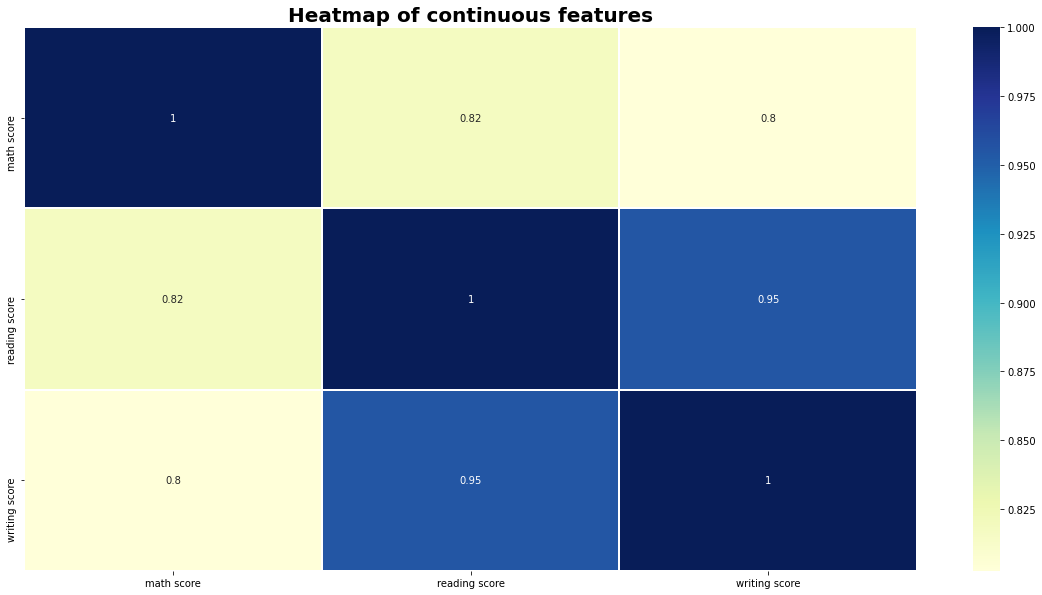

In [10]:
plt.figure(figsize=(20,10))
plt.title("Heatmap of continuous features",fontweight='bold',fontsize=20)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=1)


In [11]:
print(df['math score'].median(),df['writing score'].median(),df['reading score'].median())

66.0 69.0 70.0


### Adding subject scores to overall_score

In [14]:
df['overall_score']=df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Correlation between Writing score and math score w.r.t gender

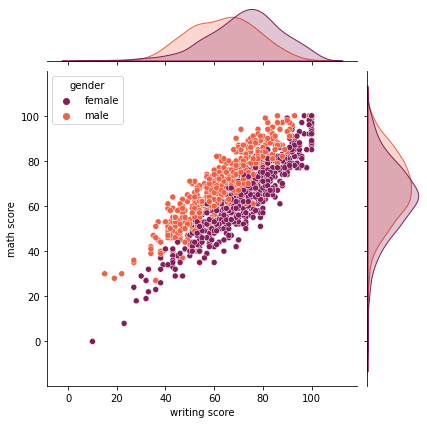

In [15]:
sns.jointplot(data=df,x='writing score',y='math score',palette='rocket',hue='gender')

### Correlation between Writing score and math score w.r.t lunch

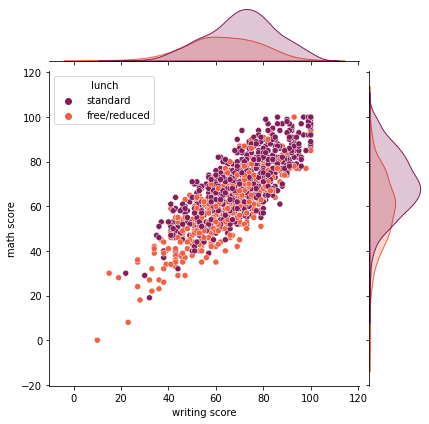

In [16]:
sns.jointplot(data=df,x='writing score',y='math score',palette='rocket',hue='lunch')

### Correlation between reading score and math score w.r.t gender

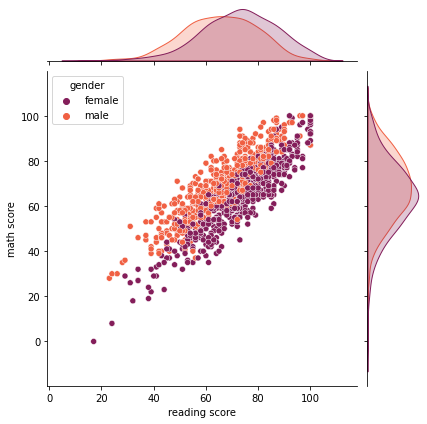

In [17]:
sns.jointplot(data=df,x='reading score',y='math score',palette='rocket',hue='gender')

### Correlation between reading score and math score w.r.t lunch

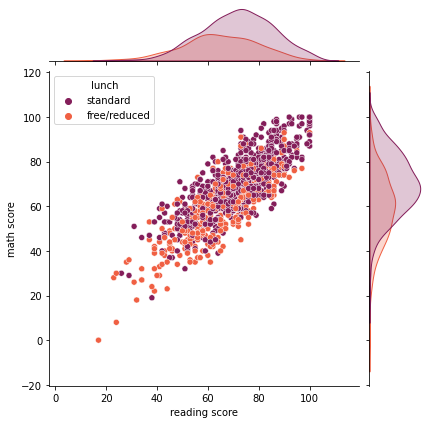

In [18]:
sns.jointplot(data=df,x='reading score',y='math score',palette='rocket',hue='lunch')

### Correlation between reading score and writing score w.r.t gender

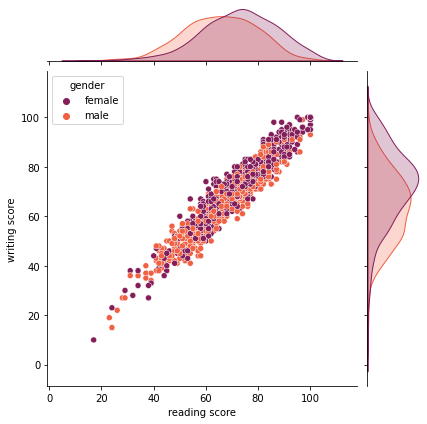

In [19]:
sns.jointplot(data=df,x='reading score',y='writing score',palette='rocket',hue='gender')

### Correlation between reading score and writing score w.r.t lunch

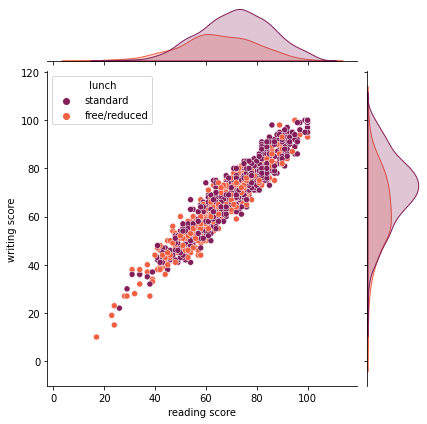

In [20]:
sns.jointplot(data=df,x='reading score',y='writing score',palette='rocket',hue='lunch')

### Feature Engineering

#### Dropping irrelevant column

In [21]:
df=df.drop(['math score','writing score','reading score'],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


#### Converting object categorical feature into numeric categorical feature.

In [22]:
df['gender']=df['gender'].map({'female':0 , 'male':1}).astype(int)
df['lunch']=df['lunch'].map({'standard':1 , 'free/reduced':0}).astype(int)
df['test preparation course']=df['test preparation course'].map({'none':0 , 'completed':1}).astype(int)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,0,group B,bachelor's degree,1,0,218
1,0,group C,some college,1,1,247
2,0,group B,master's degree,1,0,278
3,1,group A,associate's degree,0,0,148
4,1,group C,some college,1,0,229
...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,282
996,1,group C,high school,0,0,172
997,0,group C,high school,0,1,195
998,0,group D,some college,1,1,223


### One Hot Encoding

In [24]:
df=pd.get_dummies(df)
df

,gender,lunch,test preparation course,overall_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,218,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,247,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,278,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,148,1,0,0,0,0,1,0,0,0,0,0
4,1,1,0,229,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,282,0,0,0,0,1,0,0,0,1,0,0
996,1,0,0,172,0,0,1,0,0,0,0,1,0,0,0
997,0,0,1,195,0,0,1,0,0,0,0,1,0,0,0
998,0,1,1,223,0,0,0,1,0,0,0,0,0,1,0


### Seperating Independent and Dependent features

In [25]:
Y=df['overall_score']
X=df.drop('overall_score',axis=1)
X.head()

,gender,lunch,test preparation course,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,1,0


### Importing sklearn libraries for building a ML model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [28]:
#SPLITTING
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [29]:
#MODEL
model=RandomForestRegressor()
model.fit(x_train,y_train)
    

RandomForestRegressor()

In [30]:
y_pred = model.predict(x_test)

### Evaluation and Feature Importance

In [34]:
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))

RMSE:  44.71269904901059


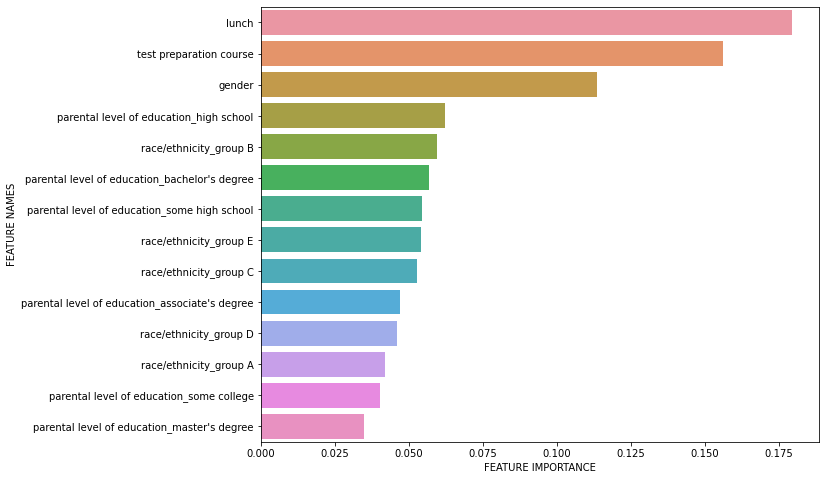

In [35]:
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()